In [52]:
from matplotlib import pyplot as plt

from sklearn import datasets,metrics

from sklearn.neighbors import KNeighborsClassifier

from keras.datasets import mnist

from seaborn import heatmap

(60000, 28, 28)


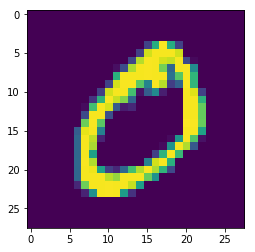

In [41]:
#visualise the data in the MNIST dataset

(X_data, Y_data),(X_val,Y_val) = mnist.load_data()

print(X_data.shape)

plt.imshow(X_data[1])

plt.show()



In [42]:
#load data for the KNN

digits = datasets.load_digits()

#print the digits data at the same point

print(digits.data[1])

#dataset is the numerical representation of the images in MNIST



[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [43]:
#because the digits is such a large dataset we are going to make it smaller

training_volume = 1200

test_volume= 300

(array([[ 0.,  0.,  0.,  8., 14., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  6., 10., 15., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 14., 10.,  0.],
       [ 0.,  2.,  8., 11., 12., 16.,  8.,  0.],
       [ 0.,  8., 16., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0., 11., 15.,  1.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  1.,  0.,  0.]]), 7)


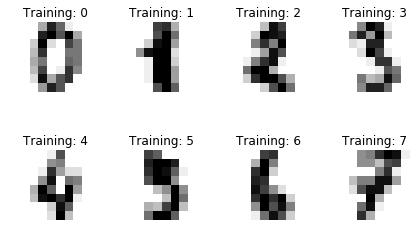

In [44]:
#lets zip together the digits and the labels

images_and_labels = list(zip(digits.images,digits.target))

print(images_and_labels[27])

for index, (image,label) in enumerate(images_and_labels[:8]):

  plt.subplot(2,4,index+1)

  plt.axis('off')

  plt.tight_layout()

  plt.imshow(image,cmap=plt.cm.gray_r)

  plt.title('Training: %i' %label)

In [45]:
import numpy as np
print(digits.images.shape)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))


(1797, 8, 8)


In [49]:
classifier = KNeighborsClassifier(algorithm='kd_tree', metric='minkowski',n_neighbors=1, p=2, n_jobs=-1,weights='distance')
classifier.fit(data[:training_volume], digits.target[:training_volume])


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='distance')

In [50]:
expected = digits.target[training_volume:]
predicted = classifier.predict(data[training_volume:])
correct = lambda x: predicted[x] == expected[x]
np.vectorize(correct)
score = np.sum(correct(range(len(predicted))))/len(predicted)
print(score)

0.964824120603015


Accuracy:
0.964824120603015
Classification report for classifier KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='distance'):
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        59
          1       0.92      1.00      0.96        61
          2       1.00      0.98      0.99        60
          3       0.98      0.90      0.94        62
          4       0.98      0.95      0.97        61
          5       0.94      0.98      0.96        59
          6       0.98      1.00      0.99        61
          7       0.98      1.00      0.99        61
          8       0.96      0.89      0.92        55
          9       0.92      0.95      0.93        58

avg / total       0.97      0.96      0.96       597


Confusion matrix:



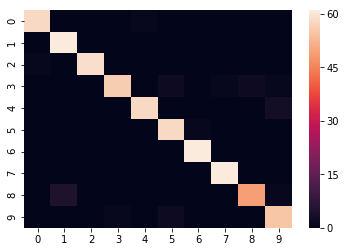

In [56]:
print("Accuracy:\n%s" % metrics.accuracy_score(expected, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n")
heatmap(metrics.confusion_matrix(expected,predicted))